## The Sparks Foundation

## Data Science and Business Analytics(Internship)

### Task 1 : Prediction using Supervised ML
###  Problem Statement : Predict the percentage of an student based on the no. of study hours. 

### Done by : Poulami Ghosh

### Step 1: Importing the required libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url) 

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step 2 : Data Wrangling

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

In [7]:
data.isnull().sum() #checking for null values

Hours     0
Scores    0
dtype: int64

### Step 2: Visualising the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

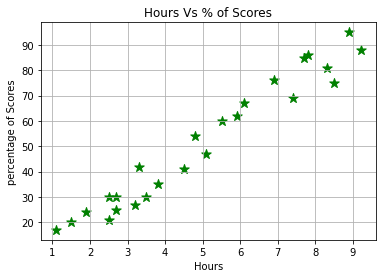

In [8]:
#plotting the data to see if there is any manual relationship can be found out between the study of hours and the percentage of scores of the students.
x = data[['Hours']]
y = data[['Scores']]

plt.scatter(x,y, color ='green', marker ='*', s =100)
plt.title('Hours Vs % of Scores')
plt.xlabel('Hours')
plt.ylabel('percentage of Scores')
plt.grid(True)
plt.show

### Step 3 : Data Preparation 

In [9]:
X = data.iloc[:,0:1].values
Y = data.iloc[:,1].values

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
# spliting our data into training and testing sets
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size = 0.2, random_state = 0)

### Step 4 : Train the Model

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,Y_train)

print('Training Complete.')

Training Complete.


### Step 5 : Visualising the Model

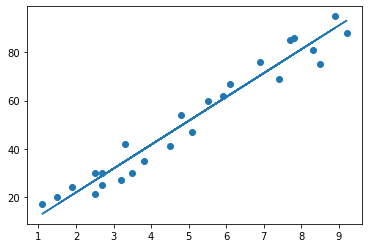

In [15]:
line = lr.coef_*X+lr.intercept_

plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

### Step 6 : Making predictions

In [16]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
Y_pred = lr.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [19]:
#comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
#testing with given data
hours = 9.25
own_pred =lr.predict([[hours]])
print("No of hours = {}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

No of hours = 9.25
Predicted score = 93.69173248737538


#### from above we can conclude that if a student studies for 9.25 hours, the predicted score will be 93.69173248737538

In [21]:
#calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_pred)

4.183859899002975

#### this is our mean absolute error after applying the linear regression model.